In [15]:
from pgmpy.models import BayesianNetwork;
from pgmpy.factors.discrete.CPD import TabularCPD;

In [16]:
graph = BayesianNetwork([('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm', 'Neighbour Call')]);
print(graph.nodes());
print('Neighbour Call' in graph);

['Burglary', 'Alarm', 'Earthquake', 'Neighbour Call']
True


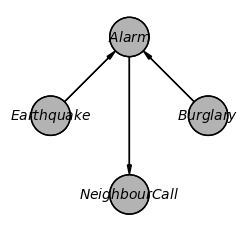

In [17]:
daft_graph = graph.to_daft();
print(daft_graph);
daft_graph.render();
daft_graph.savefig('graph.png');

In [18]:
b_cpd = TabularCPD('Burglary', 2, [[0.005], [0.995]], state_names={'Burglary': ['True', 'False']});
print(b_cpd);

+-----------------+-------+
| Burglary(True)  | 0.005 |
+-----------------+-------+
| Burglary(False) | 0.995 |
+-----------------+-------+


In [19]:
e_cpd = TabularCPD('Earthquake', 2, [[0.002], [0.998]], state_names={'Earthquake': ['True', 'False']});
print(e_cpd);

+-------------------+-------+
| Earthquake(True)  | 0.002 |
+-------------------+-------+
| Earthquake(False) | 0.998 |
+-------------------+-------+


In [20]:
a_cpd = TabularCPD('Alarm', 2, [[0.99, 0.97, 0.8, 0.001], [0.01, 0.03, 0.2, .999]], evidence=['Burglary', 'Earthquake'], evidence_card=[2, 2], state_names={'Alarm': ['True', 'False'], 'Burglary': ['True', 'False'], 'Earthquake': ['True', 'False']});
print(a_cpd);

+--------------+------------------+-----+-------------------+
| Burglary     | Burglary(True)   | ... | Burglary(False)   |
+--------------+------------------+-----+-------------------+
| Earthquake   | Earthquake(True) | ... | Earthquake(False) |
+--------------+------------------+-----+-------------------+
| Alarm(True)  | 0.99             | ... | 0.001             |
+--------------+------------------+-----+-------------------+
| Alarm(False) | 0.01             | ... | 0.999             |
+--------------+------------------+-----+-------------------+


In [21]:
n_cpd = TabularCPD('Neighbour Call', 2, [[0.98, 0.005], [0.02, 0.995]], evidence=['Alarm'], evidence_card=[2], state_names={'Neighbour Call': ['True', 'False'], 'Alarm': ['True', 'False']});
print(n_cpd);

+-----------------------+-------------+--------------+
| Alarm                 | Alarm(True) | Alarm(False) |
+-----------------------+-------------+--------------+
| Neighbour Call(True)  | 0.98        | 0.005        |
+-----------------------+-------------+--------------+
| Neighbour Call(False) | 0.02        | 0.995        |
+-----------------------+-------------+--------------+


In [22]:
graph.add_cpds(b_cpd, e_cpd, a_cpd, n_cpd);
print(graph.check_model());

True
